## Import modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()

# Scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

## Import functions

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

# Import data

In [34]:
param_values = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/X_EmulateurFeedbacksN.npy")
feedbacks = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Net_feedbacks.npy")

pc1_SW = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF1pc_SW.npy")
pc2_SW = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF2pc_SW.npy")
pc3_SW = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF3pc_SW.npy")

pc1_LW = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF1pc_LW.npy")
pc2_LW = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF2pc_LW.npy")
pc3_LW = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF3pc_LW.npy")

LW_feedbacks = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LW_feedbacks.npy")
SW_feedbacks = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/SW_feedbacks.npy")

param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LHS_paramNames.npy")

In [35]:
feedbacks_classes = (feedbacks*10).astype('int')/10

pc1_SW_classes = (pc1_SW*10).astype('int')/10
pc2_SW_classes = (pc2_SW*10).astype('int')/10
pc3_SW_classes = (pc3_SW*10).astype('int')/10

pc1_LW_classes = (pc1_LW*10).astype('int')/10
pc2_LW_classes = (pc2_LW*10).astype('int')/10
pc3_LW_classes = (pc3_LW*10).astype('int')/10

LW_feedbacks_classes = (LW_feedbacks*10).astype('int')/10 
SW_feedbacks_classes = (SW_feedbacks*10).astype('int')/10 


In [36]:
df = pd.DataFrame(param_values, columns = param_names)
df['Net_Feedbacks'] = feedbacks_classes

df['LW_feedbacks'] = LW_feedbacks_classes
df['SW_feedbacks'] = SW_feedbacks_classes

df['pc1_SW'] = pc1_SW_classes
df['pc2_SW'] = pc2_SW_classes
df['pc3_SW'] = pc3_SW_classes

df['pc1_LW'] = pc1_LW_classes
df['pc2_LW'] = pc2_LW_classes
df['pc3_LW'] = pc3_LW_classes

df

,AKN,ALPHAT,ALD,ALMAVE,AGREF,AGRE1,AGRE2,RAUTEFR,RQLCR,RAUTEFS,...,REFLCAPE,Net_Feedbacks,LW_feedbacks,SW_feedbacks,pc1_SW,pc2_SW,pc3_SW,pc1_LW,pc2_LW,pc3_LW
0,0.899023,1.476560,0.988267,1.147542,0.809408,-1.280079,-1.680087,0.936472,-0.812909,-1.438898,...,-0.322699,-0.7,2.0,-1.2,2.0,-1.8,0.6,-0.7,0.0,0.2
1,-0.596517,-0.433720,-0.425945,-0.310489,-0.473866,0.566178,-0.981551,-0.084091,0.115008,0.622718,...,1.669694,-1.6,2.0,-0.4,0.0,0.4,0.4,0.3,-0.5,1.0
2,0.399015,0.936199,-1.289027,-0.744254,-1.439555,-1.064037,-1.333498,-0.165242,-0.017389,1.614330,...,1.505608,-1.2,2.0,-0.8,0.1,-1.0,0.6,1.7,0.7,0.3
3,-0.231635,0.953665,0.062922,-1.282916,-0.253079,-0.142960,-1.444411,-0.707707,1.506940,1.541335,...,1.031449,-1.2,2.0,-0.7,0.1,-0.4,-1.6,0.6,-1.1,1.6
4,1.059531,-0.934633,0.432033,0.325198,-1.403426,-1.073134,1.668768,0.355314,1.030432,1.686638,...,0.002943,-0.7,2.1,-1.4,0.7,-2.2,0.7,0.6,0.0,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.644905,-0.651258,-1.440367,1.543060,1.239030,0.430419,-0.457615,0.289457,1.045002,-1.390153,...,1.566979,-1.4,2.1,-0.6,0.1,1.1,1.0,-0.3,-0.1,1.0
98,-0.524120,-0.969417,-0.914832,-0.343665,0.332128,0.860935,1.607778,0.170171,-0.932445,0.109067,...,1.378889,-1.5,2.1,-0.6,-1.2,0.0,0.2,-0.2,-1.7,-1.0
99,-1.227192,0.561662,-1.258506,-0.402822,0.581239,0.202258,1.274705,-0.873173,-0.292158,0.679932,...,-0.360938,-1.4,1.9,-0.5,-0.6,0.4,0.6,0.1,-0.6,-0.4
100,-1.128537,-1.040402,-1.106459,0.912701,1.180078,-0.614638,-0.412346,0.818703,-0.979835,1.336063,...,0.012042,-1.4,2.0,-0.6,0.1,0.4,1.3,0.7,-0.3,0.0


# Pair plot

In [42]:
data = ['RKDX', 'AGRE2', 'RAUTEFR', 'VVN', 'RQLCR', 'Net_Feedbacks']
df_short = df[data]
data_short = ['RKDX', 'AGRE2', 'RAUTEFR', 'VVN', 'RQLCR']
df_short

,RKDX,AGRE2,RAUTEFR,VVN,RQLCR,Net_Feedbacks
0,0.491388,-1.680087,0.936472,0.183397,-0.812909,-0.7
1,-0.051174,-0.981551,-0.084091,1.384686,0.115008,-1.6
2,-0.631673,-1.333498,-0.165242,-1.412820,-0.017389,-1.2
3,0.685305,-1.444411,-0.707707,0.467885,1.506940,-1.2
4,-0.914545,1.668768,0.355314,-1.226938,1.030432,-0.7
...,...,...,...,...,...,...
97,0.774504,-0.457615,0.289457,-0.840895,1.045002,-1.4
98,-0.149322,1.607778,0.170171,1.164882,-0.932445,-1.5
99,0.659871,1.274705,-0.873173,1.564039,-0.292158,-1.4
100,1.578718,-0.412346,0.818703,0.280044,-0.979835,-1.4


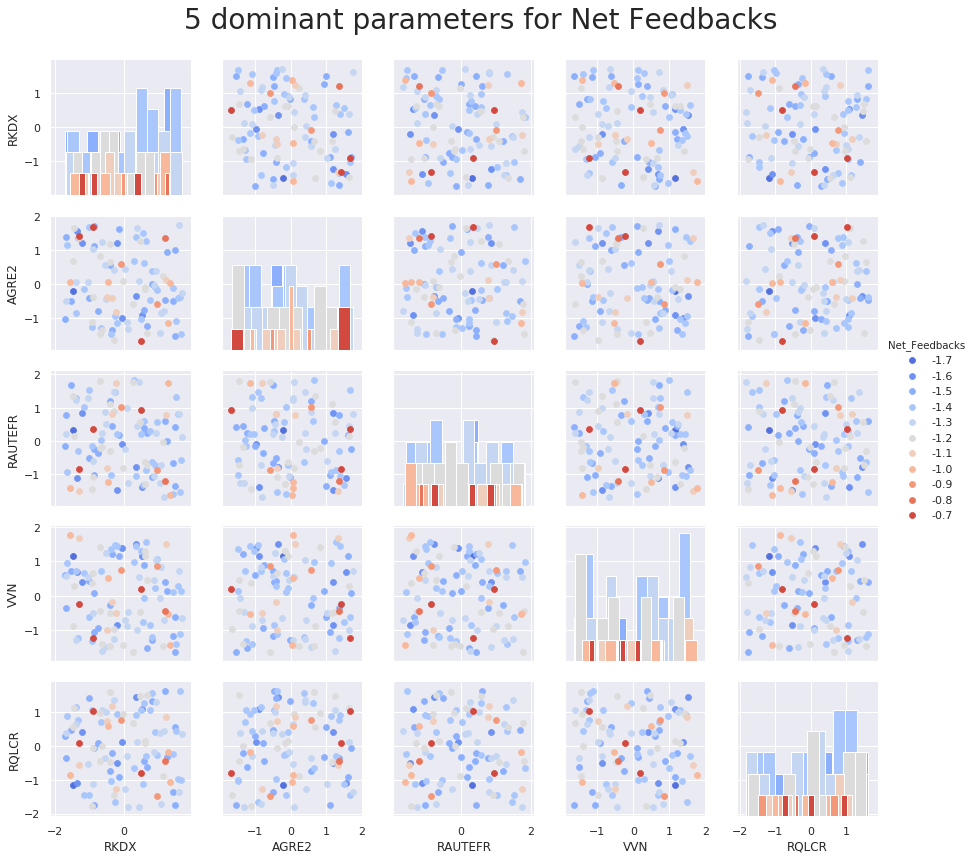

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot of parameters with the highest Sobol index



sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=norm)

ax = sns.pairplot(df_short,hue='Net_Feedbacks',markers="o",
            palette=('coolwarm'),vars=data_short, diag_kind='hist', diag_kws = {'alpha': 1.0, 'edgecolor' : None}, 
                 plot_kws = {'alpha': 1.0, 'edgecolor' : None})
#ax._legend.remove()
#ax.fig.legend(labels=range(0,10,1), title = 'Net Feedbacks')

ax.fig.subplots_adjust(top=0.92, bottom=0.08)

# Title 
plt.suptitle('5 dominant parameters for Net Feedbacks', 
             size = 28)

#   Enregistrer les figures ...............................................................

#g.savefig("/data/home/globc/peatier/figures/Pairplot_HighSoboIndices.png", dpi=None,
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1,
#        frameon=None, metadata=None)

# Show the graph ..................................

plt.show()

In [63]:
data = ['TFVL', 'RSWINHF_ICE', 'AGRE2', 'VVN', 'RLWINHF_LIQ', 'SW_feedbacks']
df_short = df[data]
data_short = ['TFVL', 'RSWINHF_ICE', 'AGRE2', 'VVN', 'RLWINHF_LIQ']
df_short

,TFVL,RSWINHF_ICE,AGRE2,VVN,RLWINHF_LIQ,SW_feedbacks
0,-0.212186,-0.090586,-1.680087,0.183397,0.229667,-1.2
1,0.079683,-0.536020,-0.981551,1.384686,1.087520,-0.4
2,-0.355007,-0.792209,-1.333498,-1.412820,-1.187547,-0.8
3,0.409284,-1.152710,-1.444411,0.467885,-1.337666,-0.7
4,-1.665397,0.764854,1.668768,-1.226938,-0.483722,-1.4
...,...,...,...,...,...,...
97,1.542211,-0.770797,-0.457615,-0.840895,1.703955,-0.6
98,0.583837,-0.615584,1.607778,1.164882,0.902613,-0.6
99,1.612187,-0.567785,1.274705,1.564039,1.480986,-0.5
100,1.052049,-1.713621,-0.412346,0.280044,0.250470,-0.6


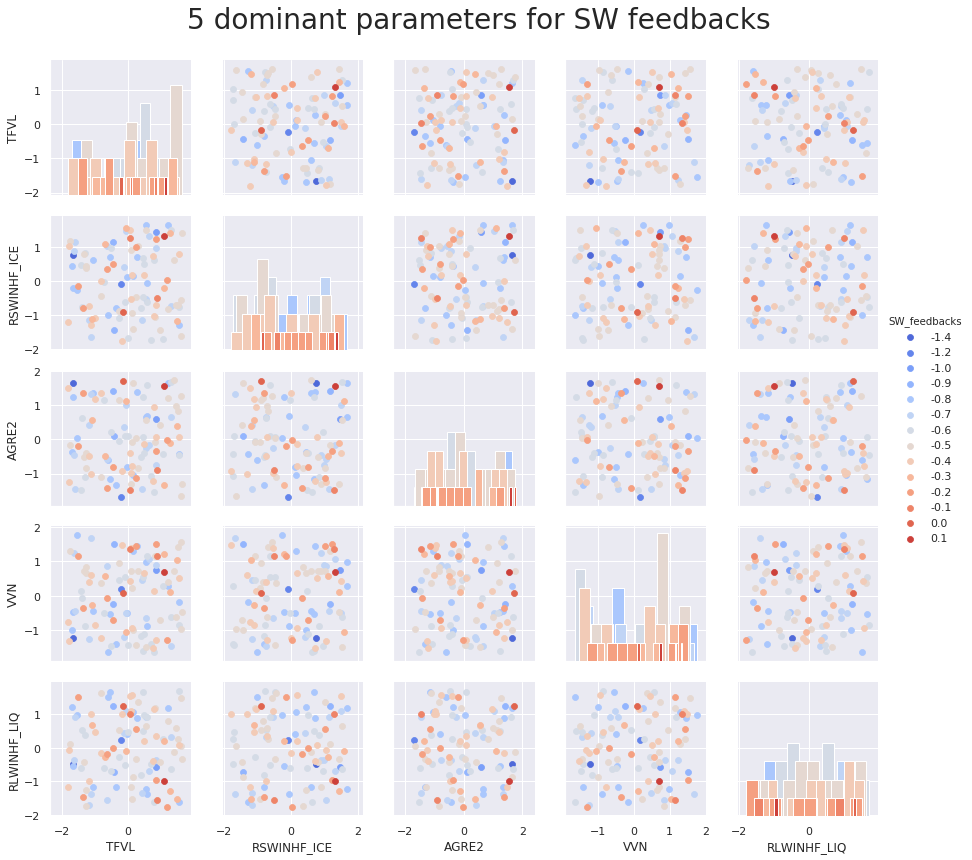

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot of parameters with the highest Sobol index



sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)

ax = sns.pairplot(df_short,hue='SW_feedbacks',markers="o",
            palette=('coolwarm'),vars=data_short, diag_kind='hist', diag_kws = {'alpha': 1.0, 'edgecolor' : None}, 
                 plot_kws = {'alpha': 1.0, 'edgecolor' : None})
#ax._legend.remove()
#ax.fig.legend(labels=range(0,10,1), title = 'Net Feedbacks')

ax.fig.subplots_adjust(top=0.92, bottom=0.08)

# Title 
plt.suptitle('5 dominant parameters for SW feedbacks', 
             size = 28)

#   Enregistrer les figures ...............................................................

#g.savefig("/data/home/globc/peatier/figures/Pairplot_HighSoboIndices.png", dpi=None,
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1,
#        frameon=None, metadata=None)

# Show the graph ..................................

plt.show()

In [65]:
data = ['VVN', 'AGRE2', 'AGRE1', 'RLWINHF_ICE', 'TENTRX', 'LW_feedbacks']
df_short = df[data]
data_short = ['VVN', 'AGRE2', 'AGRE1', 'RLWINHF_ICE', 'TENTRX']
df_short 

,VVN,AGRE2,AGRE1,RLWINHF_ICE,TENTRX,LW_feedbacks
0,0.183397,-1.680087,-1.280079,-0.745492,-0.794535,2.0
1,1.384686,-0.981551,0.566178,-1.110979,0.751534,2.0
2,-1.412820,-1.333498,-1.064037,-1.688023,-1.162094,2.0
3,0.467885,-1.444411,-0.142960,-1.328249,1.183711,2.0
4,-1.226938,1.668768,-1.073134,-1.410952,-0.266906,2.1
...,...,...,...,...,...,...
97,-0.840895,-0.457615,0.430419,0.998903,1.308293,2.1
98,1.164882,1.607778,0.860935,1.416508,1.298253,2.1
99,1.564039,1.274705,0.202258,0.668638,-0.217881,1.9
100,0.280044,-0.412346,-0.614638,0.837672,0.510319,2.0


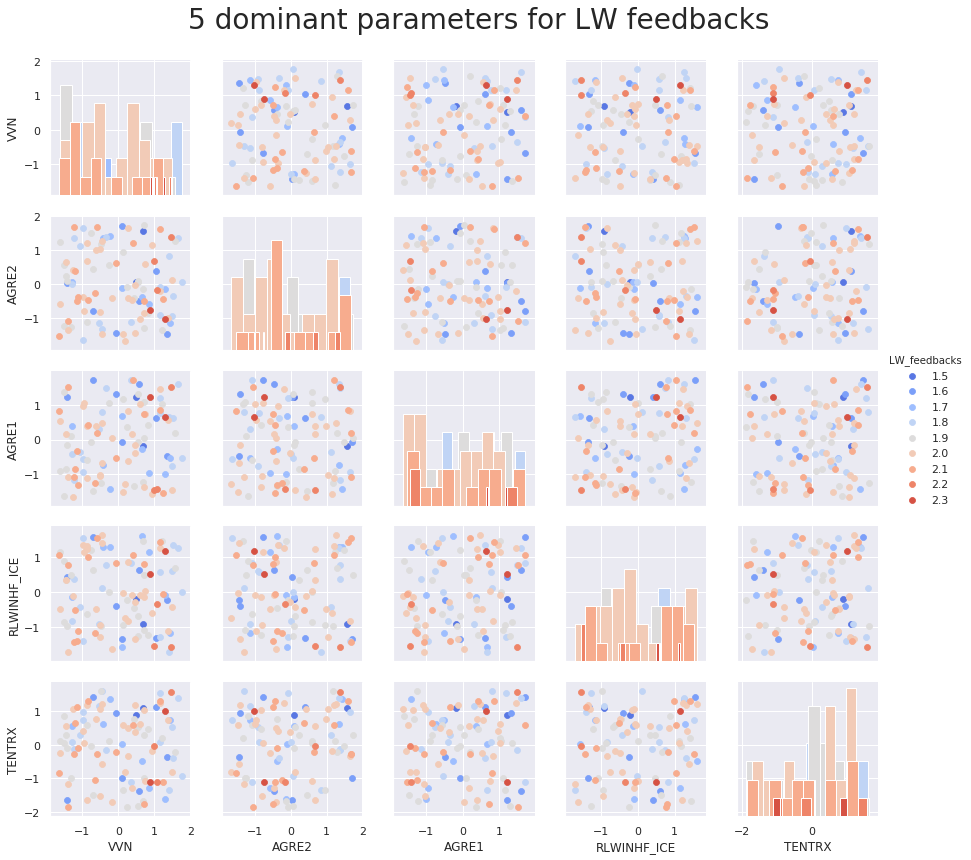

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot of parameters with the highest Sobol index



sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)

ax = sns.pairplot(df_short,hue='LW_feedbacks',markers="o",
            palette=('coolwarm'),vars=data_short, diag_kind='hist', diag_kws = {'alpha': 1.0, 'edgecolor' : None}, 
                 plot_kws = {'alpha': 1.0, 'edgecolor' : None})
#ax._legend.remove()
#ax.fig.legend(labels=range(0,10,1), title = 'Net Feedbacks')

ax.fig.subplots_adjust(top=0.92, bottom=0.08)

# Title 
plt.suptitle('5 dominant parameters for LW feedbacks', 
             size = 28)

#   Enregistrer les figures ...............................................................

#g.savefig("/data/home/globc/peatier/figures/Pairplot_HighSoboIndices.png", dpi=None,
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1,
#        frameon=None, metadata=None)

# Show the graph ..................................

plt.show()

# Choix final des 5 paramètres gardés pour l'ENSEMBLE 3

In [4]:
param_ENSEMBLE3 = ['ALMAVE', 'VVX', 'RSWINHF_ICE', 'FNEBC', 'RQLCR']

# Save the parameter names in a file for the LHS_generate

np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/ENSEMBLE3_param_names.npy', param_ENSEMBLE3)